In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
excel_file = pd.ExcelFile('./customerfeedback.xlsx')
sheet_names = excel_file.sheet_names
dfs = pd.read_excel('./customerfeedback.xlsx', sheet_name=sheet_names)
df_cust_table = dfs['Customer Table']
df_sup_tickets = dfs['Support Tickets']
df_device = dfs['Device']
df_company = dfs['Company']
df_subs = dfs['Subscription']
df_geo = dfs['Geography']
df_role = dfs['Role']

In [3]:
#EDA
df_cust_table.info()
df_cust_table['Customer ID'].is_unique
df_cust_table['Tenure'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         45218 non-null  int64  
 1   Tenure              44406 non-null  float64
 2   Geography ID        45218 non-null  int64  
 3   Completed tutorial  45218 non-null  object 
 4   Subscription ID     45218 non-null  int64  
 5   Role                45218 non-null  int64  
 6   Company ID          45218 non-null  int64  
 7   Rating              45218 non-null  object 
 8   Theme               45218 non-null  object 
 9   Original Score      45218 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.4+ MB


812

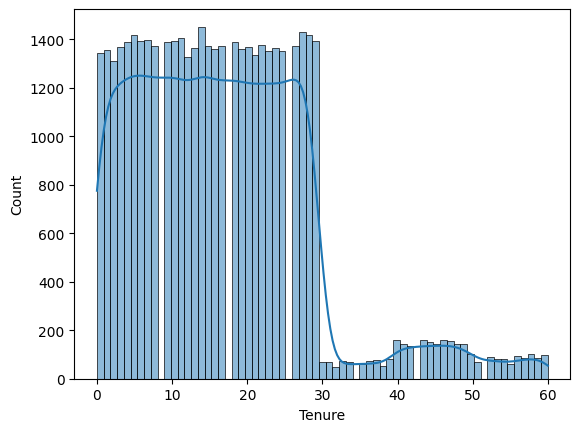

In [4]:
# Checking if the Tenure column is normal distributed(for handling the missing values)
sns.histplot(df_cust_table['Tenure'], kde=True)
plt.show()
# as we see, datas in this column are non-normally distributed. As a result, we will replace the missing values with median

In [15]:
df_cust_table['Tenure'] = df_cust_table['Tenure'].fillna(df_cust_table['Tenure'].median())
df_cust_table.info()
df_cust_table['Completed tutorial'].unique()
df_cust_table['Rating'].unique()
df_cust_table['Theme'].unique()
df_cust_table['Original Score'].max()
df_cust_table[df_cust_table['Rating'] == 'Low']['Original Score'].unique() # score given equal to or below from 5 are considered as a low rating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         45218 non-null  int64  
 1   Tenure              45218 non-null  float64
 2   Geography ID        45218 non-null  int64  
 3   Completed tutorial  45218 non-null  object 
 4   Subscription ID     45218 non-null  int64  
 5   Role                45218 non-null  int64  
 6   Company ID          45218 non-null  int64  
 7   Rating              45218 non-null  object 
 8   Theme               45218 non-null  object 
 9   Original Score      45218 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.4+ MB


array([4, 5, 2, 3, 1], dtype=int64)

In [16]:
df_sup_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126644 entries, 0 to 126643
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Support Ticket ID  126644 non-null  int64         
 1   Customer ID        126644 non-null  int64         
 2   Date Created       126644 non-null  datetime64[ns]
 3   Date Completed     126644 non-null  datetime64[ns]
 4   Escalated          126644 non-null  int64         
 5   Duration           126644 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 5.8 MB


array(['speed', 'features', 'design', 'price', 'governance', 'security',
       'reliability', 'services', 'support', 'navigation', 'other',
       'usability'], dtype=object)

In [7]:
df_device.info()
df_device['device'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69057 entries, 0 to 69056
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           69057 non-null  int64 
 1   Customer ID  69057 non-null  int64 
 2   device       69057 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


array(['browser', 'tablet', 'mobile'], dtype=object)

In [8]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company ID    3 non-null      int64 
 1   Company Size  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [9]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription ID    3 non-null      int64 
 1   Subscription Type  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [10]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography ID    10 non-null     int64 
 1   Continent       10 non-null     object
 2   Country-Region  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [11]:
df_role.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Role ID      3 non-null      int64 
 1   Role in Org  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [12]:
df_cust_table.to_csv('modified_cus_table.csv', index=False)